In [49]:
import pandas as pd
import numpy as np

In [50]:
import sqlite3

In [51]:
import matplotlib.pyplot as plt

In [52]:
database_name = 'z:/wilding-mcbride/processing/UPS2_MS1_MS2_ratio_experiment_20180621_2xMS2/UPS2_MS1_MS2_ratio_experiment_20180621_2xMS2-features-886-1770.sqlite'

In [53]:
feature_id_lower = 886
feature_id_upper = 1770

In [54]:
source_conn = sqlite3.connect(database_name)
features_df = pd.read_sql_query("select feature_id,base_peak_id from feature_base_peaks where feature_id >= {} and feature_id <= {} order by feature_id ASC;".format(feature_id_lower, feature_id_upper), source_conn)
source_conn.close()

In [55]:
feature_id = 1700
base_peak_id = 1
ms2_peak_id = 10000

In [56]:
# load the feature's base peak points
source_conn = sqlite3.connect(database_name)
feature_base_peak_points_df = pd.read_sql_query("select point_id,mz,scan,intensity from summed_ms1_regions where feature_id={} and peak_id={}".format(feature_id,base_peak_id), source_conn)
source_conn.close()

In [57]:
# Load the ms2 peaks for this feature
source_conn = sqlite3.connect(database_name)
ms2_peaks_df = pd.read_sql_query("select peak_id,intensity from ms2_peaks where feature_id={}".format(feature_id), source_conn)
source_conn.close()

In [58]:
len(ms2_peaks_df)

22991

In [59]:
# Load the ms2 peak points for this feature
source_conn = sqlite3.connect(database_name)
ms2_peak_points_df = pd.read_sql_query("select peak_id,point_id,mz,scan,intensity from summed_ms2_regions where feature_id={}".format(feature_id), source_conn)
source_conn.close()

In [60]:
base_peak_df = feature_base_peak_points_df[['scan','intensity']]

In [61]:
ms2_peak_df = ms2_peak_points_df.loc[(ms2_peak_points_df.peak_id==ms2_peak_id),['scan','intensity']]
combined_df = pd.merge(base_peak_df, ms2_peak_df, on='scan', how='outer', suffixes=('_base', '_ms2')).sort_values(by='scan')
combined_df.intensity_base.fillna(0, inplace=True)
combined_df.intensity_base = combined_df.intensity_base.astype(int)

In [62]:
combined_df

,scan,intensity_base,intensity_ms2
19,119,0,0
20,120,0,0
21,121,0,371
0,122,1744,230
1,123,2555,0
2,124,1602,411
22,125,0,0
3,126,2719,0
4,127,931,270
5,128,29039,0


In [63]:
np.corrcoef(combined_df.intensity_base, combined_df.intensity_ms2)[1,0]

-0.30413591846968863

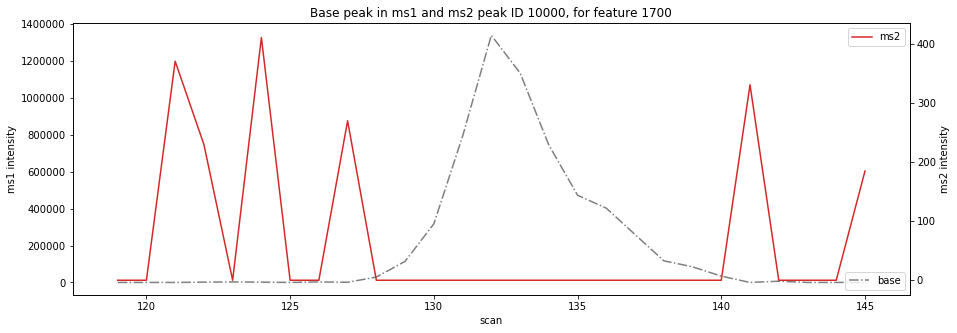

In [64]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1.plot(combined_df.scan, combined_df.intensity_base, marker='', linestyle='-.', ms=5, color='tab:gray', label='base')
ax2.plot(combined_df.scan, combined_df.intensity_ms2, marker='', linestyle='-', ms=5, color='tab:red', label='ms2')
ax2.legend(loc='upper right')
ax1.legend(loc='lower right')
ax1.set_ylabel('ms1 intensity')
ax1.set_xlabel('scan')
ax2.set_ylabel('ms2 intensity')
plt.title('Base peak in ms1 and ms2 peak ID {}, for feature {}'.format(ms2_peak_id, feature_id))
plt.margins(0.06)
plt.show()